IMPORT LIBRARIES

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


READ DATASET AND GET INFOS

In [15]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

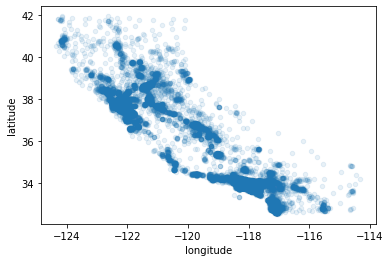

In [5]:
df.plot(x="longitude", y="latitude", kind="scatter", alpha=0.1)

FILL IN MISSING VALUES

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
imputer = SimpleImputer(strategy="mean")
imputer = ColumnTransformer([("imputer", imputer, ["total_bedrooms"])])
df['total_bedrooms'] = imputer.fit_transform(df)

In [17]:
df.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

MORE FEATURES

In [19]:
df['rooms_per_house'] = df['total_rooms'] / df['households']
df['population_per_house'] = df['population'] / df['households']

In [20]:
df.corr()["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688075
rooms_per_house         0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049454
population_per_house   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
Name: median_house_value, dtype: float64

HANDLING ONE HOT ENCODING (OHE)

In [21]:
ohe = pd.get_dummies(df['ocean_proximity'])
ohe.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [22]:
df = pd.concat([df, ohe], axis=1)
df.drop("ocean_proximity", axis=1, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,population_per_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467,0,0,0,1,0


SPLITTING DATA FOR TRAINING

In [23]:
X = df.drop("median_house_value", axis=1)
y = df['median_house_value']

In [27]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[:5]

array([[0.21115538, 0.5674814 , 0.78431373, 0.02233074, 0.01986344,
        0.00894083, 0.02055583, 0.53966842, 0.0435123 , 0.00149943,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.21215139, 0.565356  , 0.39215686, 0.18050257, 0.17147734,
        0.0672104 , 0.18697583, 0.53802706, 0.03822395, 0.00114074,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.21015936, 0.5642933 , 1.        , 0.03726029, 0.02932961,
        0.01381765, 0.02894261, 0.46602805, 0.05275646, 0.00169796,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.20916335, 0.5642933 , 1.        , 0.03235159, 0.03631285,
        0.01555537, 0.03584937, 0.35469856, 0.03524099, 0.0014933 ,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.20916335, 0.5642933 , 1.        , 0.04132967, 0.04329609,
        0.01575156, 0.04242723, 0.23077613, 0.03853386, 0.00119838,
        0.        , 0.        , 0.        , 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 15)
(16512,)
(4128, 15)
(4128,)


In [38]:
RandForest = RandomForestRegressor()

In [46]:
score = cross_val_score(RandForest, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

In [52]:
result = np.sqrt(-score)
print(result)
print(result.mean())
print(result.std())

[49323.83467898 51427.53545071 50252.34536739 49827.4290721
 50481.00716565]
50262.43034696649
703.6384543708631


PARAMETER TUNING

In [53]:
params = {'n_estimators': [3,10,20,50], 'max_features': [2,3,4,10]}

In [54]:
grid_search = GridSearchCV(RandForest, params, cv=5, scoring='neg_mean_squared_error')

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4, 10],
                         'n_estimators': [3, 10, 20, 50]},
             scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 50}

In [57]:
predictions = grid_search.best_estimator_.predict(X_test)

In [59]:
y_test[:10].values

array([ 47700.,  45800., 500001., 218600., 278000., 158700., 198200.,
       157500., 340000., 446600.])

In [60]:
comparison = pd.DataFrame({"Test": y_test[:10].values, "Predictions": predictions[:10]})

In [61]:
comparison

,Test,Predictions
0,47700.0,49602.00
1,45800.0,74428.00
2,500001.0,461768.46
3,218600.0,258458.00
4,278000.0,233474.00
5,158700.0,158362.00
6,198200.0,219756.02
7,157500.0,169340.00
8,340000.0,278406.04
9,446600.0,471026.62


EVALUATE REGRESSION MODEL

In [63]:
def regression_evaluation(predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR2 score: {r_squared}")

In [64]:
regression_evaluation(predictions)

Mean Absolute Error: 32417.27453003876 
Mean Squared Error: 2415034265.049032 
Root Mean Squared Error: 49142.99812841126 
R2 score: 0.815703776061502


In [65]:
from scipy import stats

confidence = 0.95
squared_errors = (predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([46946.21099295, 51245.70034162])